In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to the image directory and CSV file
image_dir = "./data/imgs"
csv_file = "./data/train.csv"

## Input data

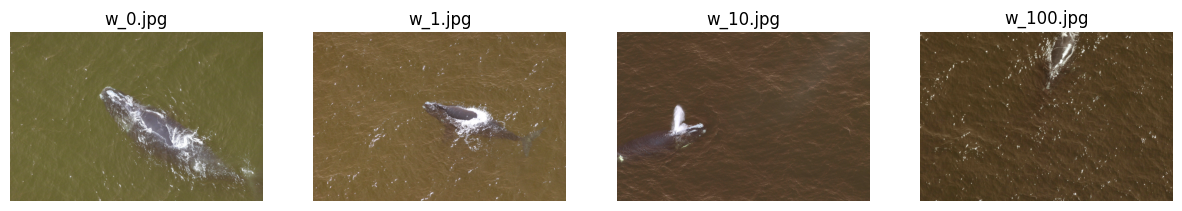

In [3]:
# Get a list of image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Display the first four images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    img = cv2.imread(os.path.join(image_dir, image_files[i]))
    axes[i].imshow(img)
    axes[i].set_title(f"{image_files[i]}")
    axes[i].axis('off')

plt.show()

## Validation Data

In [4]:
# Reading the CSV file using Pandas
data = pd.read_csv(csv_file)
data

,Image,whaleID
0,w_7812.jpg,whale_48813
1,w_4598.jpg,whale_09913
2,w_3828.jpg,whale_45062
3,w_8734.jpg,whale_74162
4,w_3251.jpg,whale_99558
...,...,...
4539,w_9399.jpg,whale_09651
4540,w_9403.jpg,whale_06967
4541,w_9428.jpg,whale_55333
4542,w_9450.jpg,whale_24458


In [5]:
# No null values
data.isna().sum()

Image      0
whaleID    0
dtype: int64

In [6]:
# Every image name occurs once
data['Image'].nunique()

4544

In [7]:
# Count the individual whales
data['whaleID'].nunique()

447

In [8]:
# Display the occurence per whaleID
data['whaleID'].value_counts()

whaleID
whale_95370    47
whale_38681    43
whale_28892    33
whale_90957    30
whale_36851    30
               ..
whale_21655     1
whale_88432     1
whale_66539     1
whale_22212     1
whale_51114     1
Name: count, Length: 447, dtype: int64

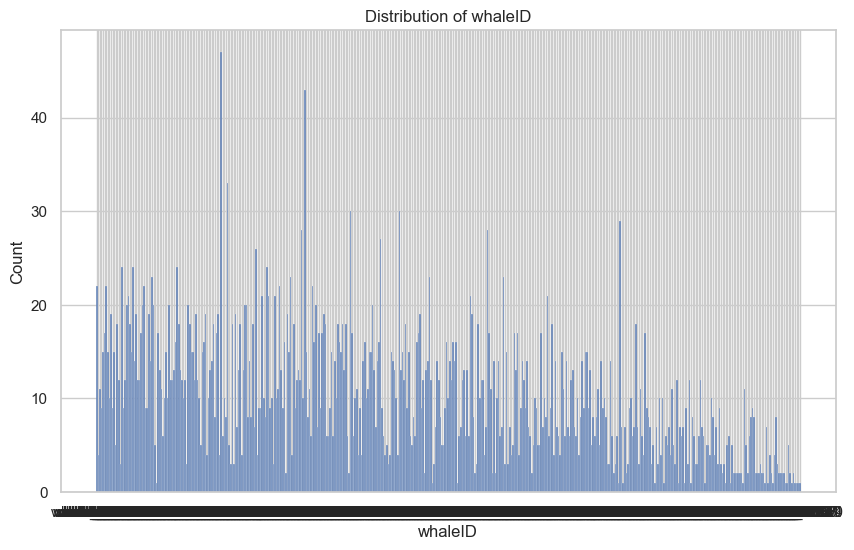

In [9]:
# Create Dist Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='whaleID')
plt.title('Distribution of whaleID')
plt.xlabel('whaleID')
plt.ylabel('Count')
plt.show()

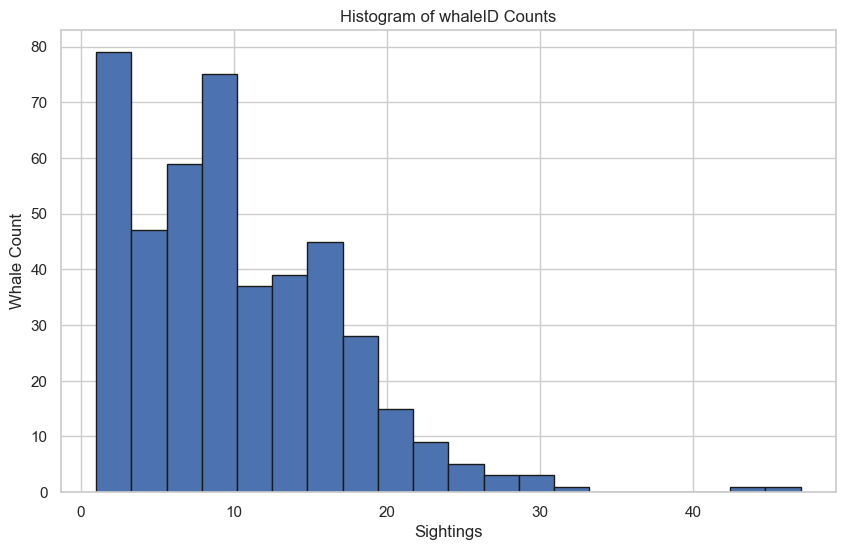

In [11]:
# Count the occurrences of each 'whaleID'
whale_id_counts = data['whaleID'].value_counts()

# Create a histogram of the counts 
plt.figure(figsize=(10, 6))  
plt.hist(whale_id_counts, bins=20, edgecolor='k')  
plt.title('Histogram of whaleID Counts') 
plt.xlabel('Sightings') 
plt.ylabel('Whale Count') 
plt.show()

## Summary

- Our training dataset consists of __4544 unique images__
- __447 individual whales__ have been tagged by experts on these images, so the quality is excellent
- The dataset is __not equally__ distributed
    - Individual whales occur between 1 and 47 times
    - Most whales occur between 1-10 times
    - Only One whale occurs 43 times and one whale 47 times
  